Nov 17-23

- find central gal that under the condition z<0.1, 0.4:

   + find the galaxies that have z<0.1;
   
   + pick the central galaxies in that;
   
   + take the correspond N_GC and M_h of the central;
   
   + plot Mh vs N_GC;
- do that for broken power law and 1 power law

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy.table import Table

In [3]:
import astropy.io.fits as fits

In [4]:
path='/data/lemn/DESIdata/'

In [5]:
#load data 
data = fits.getdata(path+'galaxies/DESIDR9_NGC_galaxy.fits')

In [6]:
#load infor of members in group
mem = fits.getdata(path+'members/iDESIDR9_NGC_1.fits')

In [7]:
M_z = data['M_zband']

In [8]:
cen_check = np.loadtxt(path+'members/iDESIDR9_NGC_1', usecols =(2))

In [9]:
mem_to_group = mem['groupID']

In [10]:
#load infor of members in group
group = fits.getdata(path+'groups/DESIDR9_NGC_group.fits')

In [11]:
group_ID = group['groupID']

In [12]:
#load theory results
M_halo_theo                 = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(0))
#N_GC_Mill_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(1))
#err_N_GC_Mill_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(2))
N_GC_Planck_Creaseytheo     = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(3))
err_N_GC_Planck_Creaseytheo = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(4))
#N_GC_COCO_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(5))
#err_N_GC_COCO_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(6))
M_halo_theo2                = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(0))
#N_GC_Mill_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(1))
#err_N_GC_Mill_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(2))
N_GC_Planck_ourtheo         = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(3))
err_N_GC_Planck_ourtheo     = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(4))
#N_GC_COCO_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(5))
#err_N_GC_COCO_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(6))

In [13]:
# load EMOSAICS Fig.1 data
mass_E   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(0))
triangle = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(1))
#square   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(2))
#star     = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(3))

In [14]:
#load Forbes 18 data
M_halo_F = np.loadtxt('/data/lemn/datalit/Forbes18_data.txt',usecols=(2))
N_GC_F   = np.loadtxt('/data/lemn/datalit/Forbes18_data.txt',usecols=(3))
M_halo_F = 10**M_halo_F

In [15]:
#load blue GCs from Creasey data
M_Creasey = np.loadtxt('/data/lemn/datalit/Creasey_Data.txt',usecols=(0))
N_Creasey = np.loadtxt('/data/lemn/datalit/Creasey_Data.txt',usecols=(1))

In [16]:
z = data['z']

In [17]:
z_pick = 0.1

In [18]:
arg_pick = np.argwhere(z <= z_pick)

In [19]:
arg_pick = arg_pick.reshape(len(arg_pick))

(array([2.00000e+00, 3.70000e+01, 8.27000e+02, 8.57700e+03, 3.45390e+04,
        7.96170e+04, 1.30927e+05, 1.61555e+05, 1.94630e+05, 2.13083e+05,
        1.96819e+05, 9.65820e+04, 2.56220e+04, 8.52600e+03, 3.99500e+03,
        1.49200e+03, 4.39000e+02, 9.10000e+01, 3.70000e+01, 2.30000e+01]),
 array([-24.11892  , -23.4143005, -22.709681 , -22.0050615, -21.300442 ,
        -20.5958225, -19.891203 , -19.1865835, -18.481964 , -17.7773445,
        -17.072725 , -16.3681055, -15.663486 , -14.9588665, -14.254247 ,
        -13.5496275, -12.845008 , -12.1403885, -11.435769 , -10.7311495,
        -10.02653  ]),
 <BarContainer object of 20 artists>)

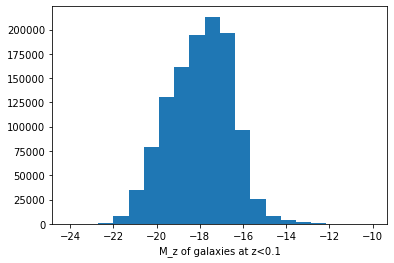

In [20]:
#plt.yscale('log')
plt.xlabel('M_z of galaxies at z<0.1')
plt.hist(M_z[arg_pick],bins=20)
#plt.savefig('Mz_z01.pdf')

In [21]:
cen_pick = np.argwhere(cen_check[arg_pick] == 1)

In [22]:
print(max(mem_to_group), min(mem_to_group), group_ID) 
#because group_ID starts from 1, while Python index starts from 0, so we need to subtract 1 to get the right index in group_ID array

51440885.0 1.0 [1.0000000e+00 2.0000000e+00 3.0000000e+00 ... 5.1440883e+07 5.1440884e+07
 5.1440885e+07]


In [23]:
group_pick = mem_to_group[arg_pick][cen_pick] #id of groups that (contains the central gal) sastified z<0.1

In [24]:
group_pick = group_pick.reshape(len(group_pick)).astype(int)

In [25]:
z_04   = 0.4
arg_04 = np.argwhere(z <= z_04)
arg_04 = arg_04.reshape(len(arg_04))
cen_04 = np.argwhere(cen_check[arg_04] == 1)
group_04 = mem_to_group[arg_04][cen_04] 
group_04 = group_04.reshape(len(group_04)).astype(int)

In [108]:
#load the summation GCs and M_h in broken power law
tot = fits.getdata('/data/lemn/results/Mh_NGCs_avg100samples.fits')

In [110]:
N_GC = tot['tot NGCs']
M_h  = tot['M halo']
err  = tot['1-sigma']

In [28]:
#load the summationn in 1 power law
onepow = fits.getdata('/data/lemn/results/Mh_NGCs_1powerlaw.fits')
M_h_1pow = onepow['M halo']
N_GC_1pow = onepow['tot NGCs']

In [29]:
err_1pow = onepow['1-sigma']

Now divide data into bins -> calculate the mean value of each bin and its error bar (https://github.com/sczesla/PyAstronomy/blob/master/src/pyasl/asl/binning.py)

- If there is no error bar in each data point: error of a bin = error of the mean of N data points inside that bin;
\begin{align}
 error_{bin} = SEM = \sqrt{\frac{\sum_i^N(x-\bar{x})^2}{N(N-1)}}
\end{align}

- There are error bars of data points (our case): error of a bin = mean error of N data points in that bin
\begin{align}
  error_{bin} = \frac{\sqrt{\sum_i^N(y_{err})^2}}{N} 
\end{align}


In [97]:
M1 = M_h_1pow[group_pick-1]
N1 = N_GC_1pow[group_pick-1]
N2 = N_GC[group_pick-1]

In [111]:
err1 = err_1pow[group_pick-1]
err2 = err[group_pick-1]

In [98]:
#divide data into bins
M_min = min(M1)
M_max = max(M1)
M_bin = np.logspace(np.log10(M_min),np.log10(M_max), 100)
print(M_bin)

[5.60628024e+10 6.16506172e+10 6.77953731e+10 7.45525807e+10
 8.19832834e+10 9.01546090e+10 9.91403757e+10 1.09021759e+11
 1.19888027e+11 1.31837342e+11 1.44977653e+11 1.59427667e+11
 1.75317923e+11 1.92791971e+11 2.12007669e+11 2.33138607e+11
 2.56375679e+11 2.81928804e+11 3.10028826e+11 3.40929594e+11
 3.74910262e+11 4.12277804e+11 4.53369793e+11 4.98557446e+11
 5.48248981e+11 6.02893302e+11 6.62984058e+11 7.29064097e+11
 8.01730375e+11 8.81639347e+11 9.69512897e+11 1.06614486e+12
 1.17240819e+12 1.28926285e+12 1.41776449e+12 1.55907397e+12
 1.71446786e+12 1.88534995e+12 2.07326397e+12 2.27990750e+12
 2.50714732e+12 2.75703627e+12 3.03183181e+12 3.33401640e+12
 3.66631992e+12 4.03174434e+12 4.43359084e+12 4.87548963e+12
 5.36143276e+12 5.89581014e+12 6.48344925e+12 7.12965873e+12
 7.84027631e+12 8.62172159e+12 9.48105402e+12 1.04260366e+13
 1.14652063e+13 1.26079506e+13 1.38645930e+13 1.52464858e+13
 1.67661126e+13 1.84372016e+13 2.02748491e+13 2.22956561e+13
 2.45178782e+13 2.696159

In [99]:
binning = np.digitize(M1, M_bin,right=True)

In [100]:
print(binning) #index of bin that this object belongs to

[11 37 10 ...  2  9  5]


In [101]:
M_sort = np.argsort(M1)

In [102]:
N_sort = N1[M_sort]
err1_sort = err1[M_sort]

In [112]:
N2_sort = N2[M_sort]
err2_sort = err2[M_sort]

In [103]:
bin_index, n_objects = np.unique(binning,return_counts=True)

In [104]:
print(bin_index, n_objects) #bin index and the number of objects inside that bin

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 89 90 92 93 99] [112157  64535  57455  54924  46644  47966  43049  37851  34252  44394
  46231  41222  36744  32843  30543  25861  22569  16000  14742  11622
  10584   9836   8243   7608   7234   6607   6196   5588   4927   4368
   3971   3506   3207   2839   2262   1863   1625   1557   1385   1215
   1048    963    779    638    606    522    440    384    355    269
    286    228    223    184    156    135    136    116     89     79
     61     62     63     41     39     31     30     22     25     16
     22     17     18     15     15      7      9     13      4      8
      7      4      6      6      3      5      4      4      4      2
      3      1      1]


In [105]:
N_mean = np.zeros(100)
N_error = np.zeros(100)
start = 0
for i in range(0,len(bin_index)):
    stop = start + n_objects[i] -1
    N_mean[i]  = np.mean(N_sort[start:stop])
    N_error[i] = np.sqrt(np.sum((err1_sort[start:stop])**2))/n_objects[i]
    start = stop + 1

In [113]:
N_mean2 = np.zeros(100)
N_error2 = np.zeros(100)
start = 0
for i in range(0,len(bin_index)):
    stop = start + n_objects[i] -1
    N_mean2[i]  = np.mean(N2_sort[start:stop])
    N_error2[i] = np.sqrt(np.sum((err2_sort[start:stop])**2))/n_objects[i]
    start = stop + 1

/cluster/home/lemn/.conda/envs/project2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/cluster/home/lemn/.conda/envs/project2/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


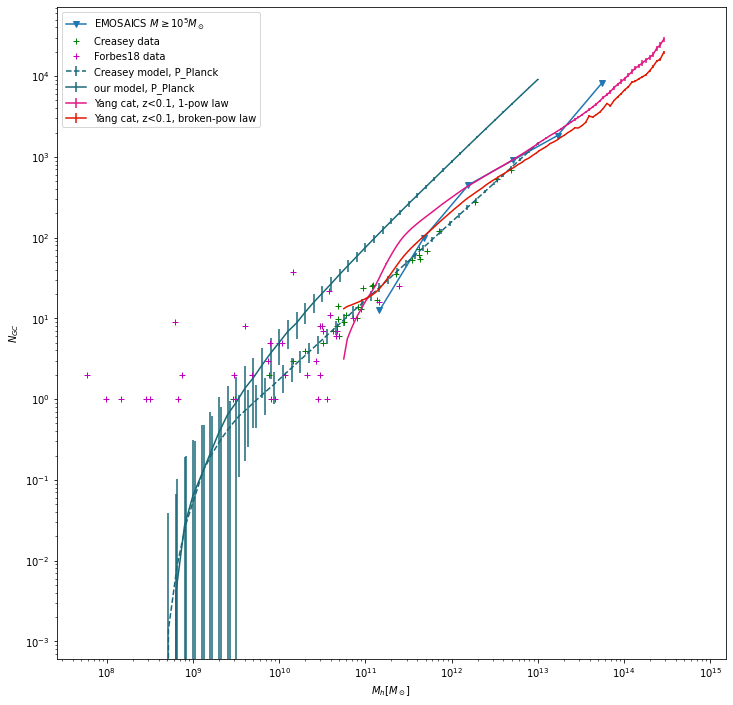

In [116]:

plt.figure(figsize=(12,12))
plt.xscale("log")
plt.yscale('log')
#plt.errorbar(M_halo_theo, N_GC_Mill_Creaseytheo,  yerr=err_N_GC_Mill_Creaseytheo,  color = '#a5c215', fmt='--',label='Creasey model, P_Mill')
plt.errorbar(M_halo_theo, N_GC_Planck_Creaseytheo,yerr=err_N_GC_Planck_Creaseytheo,color = '#186878', fmt='--',label='Creasey model, P_Planck')
#plt.errorbar(M_halo_theo, N_GC_COCO_Creaseytheo,  yerr=err_N_GC_COCO_Creaseytheo,  color = '#c23215', fmt='--',label='Creasey model, P_COCO')
#plt.errorbar(M_halo_theo2,N_GC_Mill_ourtheo,      yerr=err_N_GC_Mill_ourtheo,      color = '#a5c215',label='our model, P_Mill')
plt.errorbar(M_halo_theo2,N_GC_Planck_ourtheo,    yerr=err_N_GC_Planck_ourtheo,    color = '#186878',label='our model, P_Planck')
#plt.errorbar(M_halo_theo2,N_GC_COCO_ourtheo,      yerr=err_N_GC_COCO_ourtheo,      color = '#c23215',label='our model, P_COCO')

plt.plot(mass_E, triangle, 'v-', label = 'EMOSAICS $M \geq 10^5 M_\odot$')
#plt.plot(mass_E, square,   's-', label = 'EMOSAICS $M \geq 10^5 M_\odot$ and $[Fe/H]$')
#plt.plot(mass_E, star, '*-',     label = 'EMOSAICS $M \geq 10^5 M_\odot$, $[Fe/H]$ and $R > R_{1/2 M_\star}$')

plt.plot(M_Creasey, N_Creasey, 'g+', label ='Creasey data')
plt.plot(M_halo_F, N_GC_F, 'm+',     label ='Forbes18 data')

plt.errorbar(M_bin,N_mean,yerr=N_error,color='#e11500', label = 'Yang cat, z<0.1, 1-pow law' )
plt.errorbar(M_bin,N_mean2,yerr=N_error2,color='#e11584', label = 'Yang cat, z<0.1, broken-pow law' )

plt.xlabel('$M_h [M_\odot]$')
plt.ylabel('$N_{GC}$')
plt.legend()
#plt.savefig('tot_GC_z01_04.pdf')
#plt.show()